In [8]:
# API NOTES
#ra.get_match(matchids[0]).participants[2].timeline.role
#ra.get_match(matchids[0]).participants[2].timeline.lane
#ra.get_match(matchids[0]).participants[2].champion.name
#ra.get_match(matchids[0]).participants[3].timeline.xp_per_min_deltas.ten_to_twenty

In [9]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from cassiopeia import riotapi as ra
from cassiopeia.type.core.common import Queue
import pickle
import os
import time
ra.set_api_key('99482144-d828-401f-8c92-6c5e1d8ad852')
ra.set_region('NA')

In [10]:
# list of tuples of unique champion ids and names
all_champs = []
for champ in ra.get_champions():
    all_champs.append((champ.id,champ.name))
uniquechampid = [x[0] for x in all_champs]
uniquechampname = [x[1] for x in all_champs]

In [11]:
t0 = time.time()
path = 'match_data'

matchids = []
champids = []
bluewin = []
for filename in os.listdir(path):
    with open('match_data\\' + filename, 'rb') as f:
        match = pickle.load(f)
    # list of match ids
    matchids.append(match.id)
    # list of champ ids
    for summoner in match.participants:
        champids.append(summoner.champion.id)
    # list of boolean values for blue side victory
    bluewin.append(match.blue_team.win)
    
important_matchids = []
for matchid in matchids:
    names = []
    for summoner in ra.get_match(matchid).participants:
        names.append(summoner.champion.name)
    if len(set(names).intersection(top30names)) == 10:
        important_matchids.append(matchid)

print(time.time() - t0, 'seconds wall time')

238.06389713287354 seconds wall time


In [12]:
champcount = []
for element in uniquechampid:
    champcount.append(champids.count(element))
pair = list(zip(uniquechampname,champcount))
pair.sort(key=lambda tup: tup[1], reverse=True)

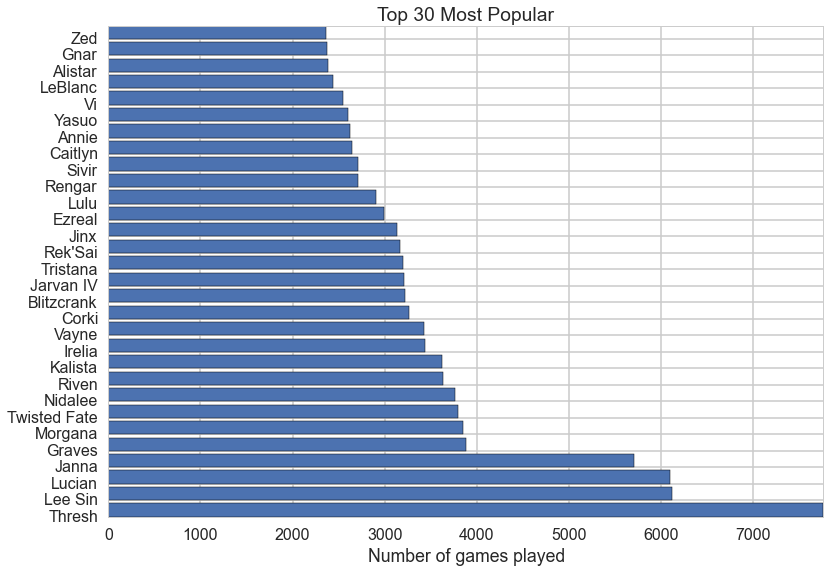

In [13]:
top30 = pair[:30]
top30names = [x[0] for x in top30]
top30count = [x[1] for x in top30]
y_pos = np.arange(len(top30names))

plt.barh(y_pos, top30count)
plt.yticks(y_pos, top30names)
plt.xlabel('Number of games played')
plt.axis('tight')
plt.title('Top 30 Most Popular')
plt.show()

In [14]:
# DO NOT RUN THIS!!!!
important_matchids = []
for matchid in matchids:
    names = []
    for summoner in ra.get_match(matchid).participants:
        names.append(summoner.champion.name)
    if len(set(names).intersection(top30names)) == 10:
        important_matchids.append(matchid)

APIError: Server returned error 500 on call: https://na.api.pvp.net/api/lol/na/v2.2/match/1406523409?includeTimeline=True&api_key=99482144-d828-401f-8c92-6c5e1d8ad852